<a href="https://colab.research.google.com/github/min10045/word2vec_practice/blob/main/%EC%9C%84%ED%82%A4%EB%8F%85%EC%8A%A4_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 27.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt


In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f0b04e8ebd0>)

In [4]:
train_data = pd.read_table('ratings.txt')

In [8]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [6]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [7]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [9]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [10]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [11]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)


In [12]:
train_data[:5] # 상위 5개 출력


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [14]:
import tqdm

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm.tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)


100%|██████████| 199992/199992 [13:54<00:00, 239.80it/s]


 [word for word in tokenized_sentence if not word in stopwords] 이런게 리스트 컴프리 핸션임



리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


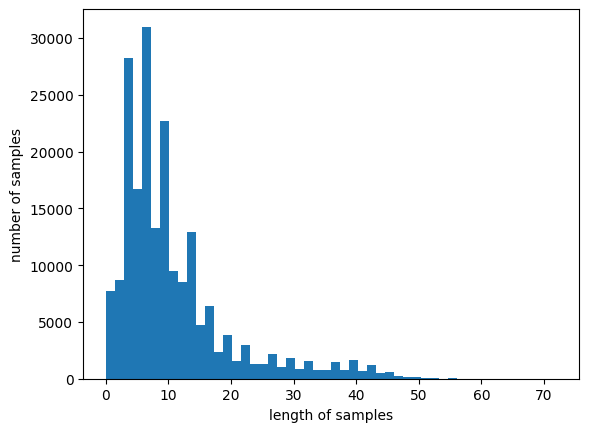

In [15]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


nltk

In [16]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)


In [17]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape


(16477, 100)

In [18]:
print(model.wv.most_similar("최민식"))


[('한석규', 0.868325412273407), ('유다인', 0.8309241533279419), ('안성기', 0.8244890570640564), ('김명민', 0.8152441382408142), ('김수현', 0.8093984127044678), ('박중훈', 0.8021022081375122), ('주진모', 0.8011214733123779), ('크리스찬', 0.7941374182701111), ('중견', 0.7881825566291809), ('송강호', 0.7811902761459351)]


In [20]:
print(model.wv.most_similar("히어로"))


[('슬래셔', 0.8553056120872498), ('물', 0.84722900390625), ('호러', 0.8435119986534119), ('무협', 0.812637448310852), ('물의', 0.809351921081543), ('느와르', 0.8084279894828796), ('멜로', 0.8016340732574463), ('블록버스터', 0.8016173839569092), ('무비', 0.7850984930992126), ('정통', 0.7828643321990967)]


In [21]:
model.wv.save_word2vec_format('ko_w2v') # 모델 저장

In [23]:
!python -m gensim.scripts.word2vec2tensor --input ko_w2v --output ko_w2v


2025-01-21 07:18:33,261 - word2vec2tensor - INFO - running /usr/local/lib/python3.11/dist-packages/gensim/scripts/word2vec2tensor.py --input ko_w2v --output ko_w2v
2025-01-21 07:18:33,262 - keyedvectors - INFO - loading projection weights from ko_w2v
2025-01-21 07:18:34,407 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (16477, 100) matrix of type float32 from ko_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2025-01-21T07:18:34.406060', 'gensim': '4.3.3', 'python': '3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]', 'platform': 'Linux-6.1.85+-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}
2025-01-21 07:18:35,540 - word2vec2tensor - INFO - 2D tensor file saved to ko_w2v_tensor.tsv
2025-01-21 07:18:35,541 - word2vec2tensor - INFO - Tensor metadata file saved to ko_w2v_metadata.tsv
2025-01-21 07:18:35,542 - word2vec2tensor - INFO - finished running word2vec2tensor.py
